In [2]:
import os
import numpy as np
import pandas as pd
import re
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('averaged_perceptron_tagger')
stopword = nltk.corpus.stopwords.words('english')
from nltk.corpus import stopwords
nltk.download('words')
from nltk.text import Text
import string, re
from sklearn.feature_extraction.text import CountVectorizer
string.punctuation
wn = nltk.WordNetLemmatizer()
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\solharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\solharsh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [249]:
# reading the data
path = r'C:\Users\solharsh\Desktop\Capstone NLP\NLP Assignment RAW\Text'
files = os.listdir(path)
files

['201002 PM.txt',
 '201102 PM.txt',
 '201203 PM.txt',
 '201302 PC.txt',
 '201402 PC Int.txt',
 '201407 AJ.txt',
 '201502 AJ.txt',
 '201602 AJ.txt',
 '201702 AJ.txt',
 '201802 AJ.txt',
 '201902 PG Int.txt',
 '201907 NS.txt']

In [250]:
#These are the files that are present in the Text folder. Lets read all the data in these files and keep it in an object

In [251]:
all_speech = []
for file in files:
    file_full_path = os.path.join(path, file)
    with open(file_full_path, encoding="ANSI") as f:
        all_speech.append(f.read().strip())

In [252]:
print('We have the data for {} files'.format(len(all_speech)))

We have the data for 12 files


In [253]:
# checking on eof the files data
print(all_speech[0])
len(all_speech[0])

Budget  2010-2011

 

Speech  of

Pranab Mukherjee

Minister of Finance

 

February  26,  2010

 

Madam Speaker,

            I rise to present the Union Budget for 2010-11.

            In 2009, when I presented the interim Budget in February and the regular Budget in July in this august House, the Indian economy was facing grave uncertainties. Growth had started decelerating and the business sentiment was weak. The economy's capacity to sustain high growth was under serious threat from the widespread economic slowdown in the developed world.

2.          It was not clear to us, as also to the policy makers in many other countries, how this crisis would eventually unfold. What would be its impact on the growth momentum of the Indian economy?  How soon will we be able to turnaround the fortunes of our economy? The short term global outlook was bleak and the consensus was that year 2009 would face the brunt of this crisis across the world.

3.          At home, there was added uncerta

 Link: https://www.indiabudget.gov.in/budget_archive/ub2010-11/bs/speecha.htm


79370

In [254]:
print(all_speech)

['Budget  2010-2011\n\n \n\nSpeech  of\n\nPranab Mukherjee\n\nMinister of Finance\n\n \n\nFebruary  26,  2010\n\n \n\nMadam Speaker,\n\n            I rise to present the Union Budget for 2010-11.\n\n            In 2009, when I presented the interim Budget in February and the regular Budget in July in this august House, the Indian economy was facing grave uncertainties. Growth had started decelerating and the business sentiment was weak. The economy\'s capacity to sustain high growth was under serious threat from the widespread economic slowdown in the developed world.\n\n2.          It was not clear to us, as also to the policy makers in many other countries, how this crisis would eventually unfold. What would be its impact on the growth momentum of the Indian economy?  How soon will we be able to turnaround the fortunes of our economy? The short term global outlook was bleak and the consensus was that year 2009 would face the brunt of this crisis across the world.\n\n3.          At ho

## Getting names of Speakers

In [255]:
pattern = r'Speech\s*of\s*(.*\s.*)\s*Minister'
found = re.findall(pattern, ' '.join(all_speech))
speakers = [f.replace('\n', '').strip() for f in found]
print(*speakers, len(speakers), sep='\n')

Pranab Mukherjee
Pranab Mukherjee
Pranab Mukherjee
P. Chidambaram
P. Chidambaram
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Arun Jaitley
Piyush Goyal
Nirmala Sitharaman
12


## Getting all the speech dates

In [256]:
speech_dates = []
pattern = r'[A-Z]\w+\s*\d{1,2}\s*,\s*\d{4}'
for speech in all_speech:
    found = re.search(pattern, speech)
    if found:
        speech_date = speech[found.start():found.end()].replace('\n','').strip()
        speech_dates.append(speech_date)
print(*speech_dates, len(speech_dates), sep='\n')

February  26,  2010
February 28, 2011
March 16, 2012
February 28, 2013
February 17, 2014
July 10, 2014
February 28, 2015
February 29, 2016
February 1, 2017
February 1, 2018
February 1, 2019
July 5, 2019
12


## Creating a DataFrame from speaker names, dates and corresponding speeches

In [257]:
rawData = pd.DataFrame({'Speaker_Name':speakers,'Date_Of_Speech':speech_dates,'Speech':all_speech})
rawData

,Speaker_Name,Date_Of_Speech,Speech
0,Pranab Mukherjee,"February 26, 2010",Budget 2010-2011\n\n \n\nSpeech of\n\nPranab...
1,Pranab Mukherjee,"February 28, 2011",Budget 2011-2012 \n\nSpeech of \n\nPranab Mukh...
2,Pranab Mukherjee,"March 16, 2012",Budget 2012-2013 \n\nSpeech of \n\nPranab Mukh...
3,P. Chidambaram,"February 28, 2013",Budget 2013-2014 \n\nSpeech of \n\nP. Chidamba...
4,P. Chidambaram,"February 17, 2014",Interim Budget 2014-2015 \n\nSpeech of \n\nP. ...
5,Arun Jaitley,"July 10, 2014",Budget 2014-2015 \n\nSpeech of \n\nArun Jaitle...
6,Arun Jaitley,"February 28, 2015",CONTENTS \n\nPART -A \n\nPage No. \nIntroducti...
7,Arun Jaitley,"February 29, 2016",CONTENTS \n\nPART -A \n\nPage No. \n\nIntroduc...
8,Arun Jaitley,"February 1, 2017",CONTENTS \n\n \n\nPART - A \n\n Page No. \n\n ...
9,Arun Jaitley,"February 1, 2018",Budget 2018-2019 \n\n \n\nSpeech of \n\nArun J...


### Removing everything before "I rise to present" as it is common in all files and the speech begins after it.

In [258]:
first = rawData['Speech'][0][rawData['Speech'][0].find('present'):]
second = rawData['Speech'][1][rawData['Speech'][1].find('present'):]
third = rawData['Speech'][2][rawData['Speech'][2].find('present'):]
fourth = rawData['Speech'][3][rawData['Speech'][3].find('present'):]
fifth = rawData['Speech'][4][rawData['Speech'][4].find('present'):]
sixth = rawData['Speech'][5][rawData['Speech'][5].find('present'):]
seventh = rawData['Speech'][6][rawData['Speech'][6].find('present'):]
eighth = rawData['Speech'][7][rawData['Speech'][7].find('present'):]
ninth = rawData['Speech'][8][rawData['Speech'][8].find('present'):]
tenth = rawData['Speech'][9][rawData['Speech'][9].find('present'):]
eleventh = rawData['Speech'][10][rawData['Speech'][10].find('present'):]
twelth = rawData['Speech'][11][rawData['Speech'][11].find('present'):]
rawData['Speech'].iat[0] = first
rawData['Speech'].iat[1] = second
rawData['Speech'].iat[2] = third
rawData['Speech'].iat[3] = fourth
rawData['Speech'].iat[4] = fifth
rawData['Speech'].iat[5] = sixth
rawData['Speech'].iat[6] = seventh
rawData['Speech'].iat[7] = eighth
rawData['Speech'].iat[8] = ninth
rawData['Speech'].iat[9] = tenth
rawData['Speech'].iat[10] = eleventh
rawData['Speech'].iat[11] = twelth
rawData

,Speaker_Name,Date_Of_Speech,Speech
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo..."


# Explore the dataset

In [259]:
#shape of dataset
print("Input data has {} rows and {} columns".format(len(rawData), len(rawData.columns)))

Input data has 12 rows and 3 columns


In [260]:
# how much missing data is there?
print("Number of Nulls in the Speeches: {}".format(rawData['Speech'].isnull().sum()))

Number of Nulls in the Speeches: 0


In [261]:
len(rawData['Speech'])

12

What happens in below lines of code is that 12 speeches are preprocessed, tokenized and represented as a sparse matrix. 
By default, CountVectorizer does the following:

lowercases your text (we can set lowercase=false if we don’t want lowercasing)
uses utf-8 encoding
performs tokenization (converts raw text to smaller units of text)
uses word level tokenization (meaning each word is treated as a separate token)
ignores single characters during tokenization (words like ‘a’ and ‘I’)

In [262]:
cv = CountVectorizer(all_speech)
count_vector=cv.fit_transform(all_speech)

In [263]:
# show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
cv.vocabulary_

{'budget': 2618,
 '2010': 425,
 '2011': 426,
 'speech': 9950,
 'of': 7647,
 'pranab': 8334,
 'mukherjee': 7310,
 'minister': 7137,
 'finance': 4992,
 'february': 4916,
 '26': 579,
 'madam': 6819,
 'speaker': 9932,
 'rise': 9274,
 'to': 10614,
 'present': 8383,
 'the': 10521,
 'union': 10927,
 'for': 5100,
 '11': 97,
 'in': 5948,
 '2009': 423,
 'when': 11368,
 'presented': 8385,
 'interim': 6190,
 'and': 1906,
 'regular': 8947,
 'july': 6372,
 'this': 10559,
 'august': 2183,
 'house': 5754,
 'indian': 6021,
 'economy': 4337,
 'was': 11295,
 'facing': 4840,
 'grave': 5446,
 'uncertainties': 10857,
 'growth': 5475,
 'had': 5513,
 'started': 10050,
 'decelerating': 3748,
 'business': 2650,
 'sentiment': 9591,
 'weak': 11325,
 'capacity': 2720,
 'sustain': 10315,
 'high': 5661,
 'under': 10871,
 'serious': 9601,
 'threat': 10569,
 'from': 5204,
 'widespread': 11398,
 'economic': 4332,
 'slowdown': 9828,
 'developed': 3951,
 'world': 11462,
 'it': 6293,
 'not': 7525,
 'clear': 3030,
 'us': 1

In [264]:
count_vector.shape
#We have 12 (rows) documents and 11613 unique words (columns)!

(12, 11613)

In [265]:
#Eliminating words that appeared in less than 2 Speeches and the common words that are beyond 85% percent of our corpus
cv = CountVectorizer(all_speech,min_df=2,max_df=0.85)
count_vector=cv.fit_transform(all_speech)

In [266]:
count_vector.shape
#We have 12 (rows) documents and 6028 unique words now!

(12, 5287)

In [267]:
#To see, what words are removed
cv.stop_words_

{'exhibited',
 'naib',
 'ugc',
 'chocolates',
 'brushes',
 'defending',
 'errors',
 'flew',
 'indicator',
 '46155',
 'incidentally',
 'valoremas',
 'invoices',
 'bull',
 '194l',
 '678819',
 'le',
 'representation',
 'their',
 'define',
 'agrowaste',
 'eutectic',
 'admissions',
 'parts',
 'prove',
 'couple',
 'ballooned',
 'qutub',
 'kamarajar',
 '67',
 'read',
 'anyone',
 'sudden',
 'commuter',
 'duringthe',
 'significant',
 '8408',
 'player',
 'houseless',
 'highlights',
 'consulting',
 '52',
 'awaited',
 'fairground',
 '1560',
 'elders',
 'written',
 'amc',
 'episodes',
 'word',
 'tranche',
 'neodymium',
 'sensitivity',
 'cultivators',
 'demonstrated',
 'dhoopbatti',
 'current',
 'proposals',
 'economist',
 'kayaka',
 'accountholders',
 'by',
 'experienced',
 'identifiable',
 'unannounced',
 'invalid',
 'business',
 'contemplates',
 'trusting',
 '18800',
 'generation',
 'concentration',
 'proposed',
 'underlines',
 'regulates',
 'salient',
 'turmoil',
 'calculating',
 'haulage',
 'as

In [268]:
#To see what’s remaining, all we need to do is check the vocabulary again. These are words that appeared in all 12 Speeches.
cv.vocabulary_

{'2010': 168,
 '2011': 169,
 'pranab': 3727,
 'mukherjee': 3243,
 'union': 5002,
 '2009': 166,
 'presented': 3755,
 'interim': 2698,
 'regular': 4044,
 'july': 2779,
 'facing': 2066,
 'uncertainties': 4974,
 'sentiment': 4368,
 'weak': 5171,
 'sustain': 4715,
 'serious': 4372,
 'threat': 4831,
 'widespread': 5216,
 'slowdown': 4483,
 'clear': 1148,
 'makers': 3021,
 'countries': 1432,
 'how': 2502,
 'crisis': 1457,
 'eventually': 1969,
 'unfold': 4996,
 'what': 5193,
 'impact': 2559,
 'momentum': 3212,
 'soon': 4515,
 'turnaround': 4947,
 'fortunes': 2232,
 'short': 4425,
 'outlook': 3476,
 'consensus': 1314,
 'face': 2059,
 'across': 433,
 'home': 2482,
 'added': 446,
 'uncertainty': 4975,
 'delayed': 1565,
 'normal': 3336,
 'south': 4523,
 'west': 5191,
 'monsoon': 3220,
 'kharif': 2813,
 'crop': 1461,
 'concerns': 1278,
 'items': 2743,
 'possible': 3708,
 'stand': 4573,
 'you': 5275,
 'say': 4303,
 'confidence': 1298,
 'weathered': 5177,
 'far': 2085,
 'better': 845,
 'position': 37

In [296]:
# Find the top 30 words said by each FM
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict 

{'PM_2010': [('rs', 110),
  ('cent', 103),
  ('propose', 92),
  ('crore', 87),
  ('year', 70),
  ('duty', 63),
  ('government', 61),
  ('tax', 53),
  ('sector', 51),
  ('development', 36),
  ('budget', 34),
  ('provide', 34),
  ('growth', 33),
  ('fiscal', 29),
  ('financial', 28),
  ('national', 27),
  ('central', 27),
  ('scheme', 25),
  ('excise', 25),
  ('policy', 23),
  ('public', 23),
  ('exemption', 22),
  ('rural', 22),
  ('infrastructure', 22),
  ('customs', 21),
  ('plan', 21),
  ('additional', 19),
  ('time', 19),
  ('service', 19),
  ('increase', 18)],
 'PM_2011': [('cent', 133),
  ('crore', 104),
  ('propose', 84),
  ('year', 65),
  ('tax', 61),
  ('duty', 57),
  ('government', 42),
  ('sector', 41),
  ('budget', 37),
  ('customs', 33),
  ('development', 32),
  ('excise', 32),
  ('central', 31),
  ('national', 30),
  ('public', 28),
  ('infrastructure', 28),
  ('basic', 27),
  ('provide', 27),
  ('scheme', 26),
  ('rate', 24),
  ('production', 23),
  ('exemption', 23),
  (

In [297]:
# Print the top 15 words said by each FM
for Speakers, top_words in top_dict.items():
    print(Speakers)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

PM_2010
rs, cent, propose, crore, year, duty, government, tax, sector, development, budget, provide, growth, fiscal
---
PM_2011
cent, crore, propose, year, tax, duty, government, sector, budget, customs, development, excise, central, national
---
PM_2012
cent, crore, propose, duty, year, tax, sector, basic, national, customs, government, scheme, development, rate
---
PC_13
propose, crore, percent, tax, provide, government, year, sector, development, investment, funds, fund, rate, plan
---
PC_14
crore, percent, year, growth, propose, government, budget, financial, new, ministry, expenditure, current, scheme, tax
---
AJ_14
propose, crore, percent, government, set, sector, tax, year, sum, development, financial, duty, country, provide
---
AJ_15
tax, crore, act, government, service, duty, year, excise, investment, madam, income, provide, credit, propose
---
AJ_16
tax, duty, act, nil, government, provide, excise, crore, section, year, service, effect, income, propose
---
AJ_17
tax, governme

### Figuring out length of each speech and how much percentage of the speech is punctuations

In [271]:
import string
string.punctuation

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

rawData['Speech_len'] = rawData['Speech'].apply(lambda x: len(x) - x.count(" "))
rawData['Speech_punct%'] = rawData['Speech'].apply(lambda x: count_punct(x))
rawData

,Speaker_Name,Date_Of_Speech,Speech,Speech_len,Speech_punct%
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,65386,2.6
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,73724,2.9
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,74782,3.1
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,65245,3.1
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,33976,3.4
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,86601,2.4
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,93507,3.3
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,130710,3.3
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...,99901,3.0
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo...",100216,3.1


### Removing Puntuations, Acronyms, Non-English Words and Converting to Lower case

In [272]:
#removing punctuations
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct
rawData['Speech_Clean'] = rawData['Speech'].apply(lambda x:remove_punct(x))
#Removing acronyms
import re 
def remove_ACR(text):
    text_noACR = re.sub(r"\b[A-Z]{2,}\b", "", text)
    return text_noACR
rawData['Speech_Clean'] = rawData['Speech_Clean'].apply(lambda x: remove_ACR(x))
#Removing non english words
words = set(nltk.corpus.words.words())
def remove_noneng(text):
    text_noeng = " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())
    return text_noeng
rawData['Speech_Clean'] = rawData['Speech_Clean'].apply(lambda x: remove_noneng(x))
def remove_dig(text):
    text_nonum = re.sub(r"\d+","",text)
    return text_nonum
rawData['Speech_Clean'] = rawData['Speech_Clean'].apply(lambda x: remove_dig(x))
#Converting to lower case
rawData['Speech_Clean'] = rawData['Speech_Clean'].apply(lambda x: x.lower())
rawData['Speech_Clean']

0     present the union budget for  in  when i the i...
1     present the union budget for  we are reaching ...
2     present the union budget for  for the economy ...
3     present the budget for the year   i recall my ...
4     present the interim budget for  the current ec...
5     present the budget for the year  i  the people...
6     present the budget of the union for the year  ...
7     present the budget for the year   i am this bu...
8     present the budget for  spring is a season of ...
9     present the budget for   madam four ago we to ...
10    present the interim budget for the year  a  i ...
11    present the budget for the year  a  the recent...
Name: Speech_Clean, dtype: object

## Tokenizing and removing Stopwords

In [273]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

rawData['Speech_Tokenize_NoStop'] = rawData['Speech_Clean'].apply(lambda x: tokenize(x.lower()))
rawData.head()
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

rawData['Speech_Tokenize_NoStop'] = rawData['Speech_Tokenize_NoStop'].apply(lambda x: remove_stopwords(x))

In [274]:
#Checking count of punctuations and words after pre-processing steps
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

rawData['Speech_len'] = rawData['Speech_Tokenize_NoStop'].apply(lambda x: len(x) - x.count(" "))
rawData['Speech_punct%'] = rawData['Speech_Tokenize_NoStop'].apply(lambda x: count_punct(x))
#rawData = rawData.set_index('Speaker_Name')
rawData

,Speaker_Name,Date_Of_Speech,Speech,Speech_len,Speech_punct%,Speech_Clean,Speech_Tokenize_NoStop
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,5221,0.0,present the union budget for in when i the i...,"[present, union, budget, interim, budget, regu..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,5446,0.0,present the union budget for we are reaching ...,"[present, union, budget, reaching, end, remark..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,5746,0.0,present the union budget for for the economy ...,"[present, union, budget, economy, year, recove..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,4922,0.0,present the budget for the year i recall my ...,"[present, budget, year, recall, last, tenure, ..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,2470,0.0,present the interim budget for the current ec...,"[present, interim, budget, current, economic, ..."
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,6725,0.0,present the budget for the year i the people...,"[present, budget, year, people, decisively, ch..."
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,7020,0.0,present the budget of the union for the year ...,"[present, budget, union, year, present, budget..."
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,9455,0.0,present the budget for the year i am this bu...,"[present, budget, year, budget, global, econom..."
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...,6966,0.0,present the budget for spring is a season of ...,"[present, budget, spring, season, optimism, ex..."
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo...",6967,0.0,present the budget for madam four ago we to ...,"[present, budget, madam, four, ago, people, gi..."


### All the punctuations are removed and speech length (corpus) has been significantly reduced after the pre-processing steps

## Lemmatizing

In [275]:
def lemmatizing(tokenized_text):
    LemmaText = [wn.lemmatize(word) for word in tokenized_text]
    return LemmaText

rawData['Speech_Lemmatized'] = rawData['Speech_Tokenize_NoStop'].apply(lambda x: lemmatizing(x))
rawData

,Speaker_Name,Date_Of_Speech,Speech,Speech_len,Speech_punct%,Speech_Clean,Speech_Tokenize_NoStop,Speech_Lemmatized
0,Pranab Mukherjee,"February 26, 2010",present the Union Budget for 2010-11.\n\n ...,5221,0.0,present the union budget for in when i the i...,"[present, union, budget, interim, budget, regu...","[present, union, budget, interim, budget, regu..."
1,Pranab Mukherjee,"February 28, 2011",present the Union Budget for 2011-12. \n\nWe a...,5446,0.0,present the union budget for we are reaching ...,"[present, union, budget, reaching, end, remark...","[present, union, budget, reaching, end, remark..."
2,Pranab Mukherjee,"March 16, 2012",present the Union Budget for 2012-13. \n\nFor ...,5746,0.0,present the union budget for for the economy ...,"[present, union, budget, economy, year, recove...","[present, union, budget, economy, year, recove..."
3,P. Chidambaram,"February 28, 2013",present the Budget for the year 2013-14. \n\n2...,4922,0.0,present the budget for the year i recall my ...,"[present, budget, year, recall, last, tenure, ...","[present, budget, year, recall, last, tenure, ..."
4,P. Chidambaram,"February 17, 2014",present the Interim Budget for 2014-15. \n\nTh...,2470,0.0,present the interim budget for the current ec...,"[present, interim, budget, current, economic, ...","[present, interim, budget, current, economic, ..."
5,Arun Jaitley,"July 10, 2014",present the Budget for the year 2014-15. \n\nI...,6725,0.0,present the budget for the year i the people...,"[present, budget, year, people, decisively, ch...","[present, budget, year, people, decisively, ch..."
6,Arun Jaitley,"February 28, 2015",present the Budget of the Union for the year 2...,7020,0.0,present the budget of the union for the year ...,"[present, budget, union, year, present, budget...","[present, budget, union, year, present, budget..."
7,Arun Jaitley,"February 29, 2016",present the Budget for the year 2016-17. \n\n2...,9455,0.0,present the budget for the year i am this bu...,"[present, budget, year, budget, global, econom...","[present, budget, year, budget, global, econom..."
8,Arun Jaitley,"February 1, 2017",present the Budget \nfor 2017-18. Spring is a ...,6966,0.0,present the budget for spring is a season of ...,"[present, budget, spring, season, optimism, ex...","[present, budget, spring, season, optimism, ex..."
9,Arun Jaitley,"February 1, 2018","present the Budget for 2018-19. \n2. Madam, fo...",6967,0.0,present the budget for madam four ago we to ...,"[present, budget, madam, four, ago, people, gi...","[present, budget, madam, four, ago, people, gi..."


In [396]:
data_dtm1 =data_dtm.copy()

In [397]:
data_dtm.index = rawData[['Speaker_Name','Speech_Clean']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)

In [400]:
Speakers = rawData['Speaker_Name']
data_clean = rawData
data_clean.drop(['Speech','Speech_len','Speech_punct%','Speech_Tokenize_NoStop','Speech_Lemmatized'],axis=1)

,Speaker_Name,Date_Of_Speech,Speech_Clean
0,Pranab Mukherjee,"February 26, 2010",present the union budget for in when i the i...
1,Pranab Mukherjee,"February 28, 2011",present the union budget for we are reaching ...
2,Pranab Mukherjee,"March 16, 2012",present the union budget for for the economy ...
3,P. Chidambaram,"February 28, 2013",present the budget for the year i recall my ...
4,P. Chidambaram,"February 17, 2014",present the interim budget for the current ec...
5,Arun Jaitley,"July 10, 2014",present the budget for the year i the people...
6,Arun Jaitley,"February 28, 2015",present the budget of the union for the year ...
7,Arun Jaitley,"February 29, 2016",present the budget for the year i am this bu...
8,Arun Jaitley,"February 1, 2017",present the budget for spring is a season of ...
9,Arun Jaitley,"February 1, 2018",present the budget for madam four ago we to ...


After we cleaned our data, we will now transform our corpus to a numerical format to make it understandable by the machine. To do that we are going to use the CountVectorizer function from the sklearn library.

At the same time we are going to use a functionality of CountVectorizer function that eliminates stop words. Another method to do remove stop words is by using the stopwords corpus from nltk library.


In [401]:
#To keep track of the presidents, we create a new column that is the concatenation of the date and speakers’s name.
#This column will be the index of our term-document matrix.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(data_clean.Speech_Clean)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean[['Speaker_Name','Date_Of_Speech']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
data_dtm.head()

,aa,aam,ab,abatement,abeyance,abiding,ability,able,abolish,abolition,...,youth,youthful,zeolite,zero,zinc,zirconia,zone,zoo,àééä½,é½é
"Pranab Mukherjee:February 26, 2010",0,2,0,0,0,0,0,5,0,0,...,1,0,0,1,0,0,0,0,0,0
"Pranab Mukherjee:February 28, 2011",0,1,0,4,0,0,1,5,0,0,...,2,0,0,0,0,0,1,0,0,0
"Pranab Mukherjee:March 16, 2012",0,0,0,3,1,0,0,3,0,0,...,2,0,0,0,0,0,1,0,0,0
"P. Chidambaram:February 28, 2013",0,0,0,2,0,0,0,5,0,0,...,7,0,0,5,1,0,0,0,0,0
"P. Chidambaram:February 17, 2014",0,0,0,0,0,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,0


This large matrix gives us a numerical representation of our corpus by specifying the words used in each speech.

At the end of the text pre-processing phase, we generated a numerical matrix that features the words used in each speech transcript of our corpus. Also called a document-term matrix.


I am going to apply an unsupervised model called LDA (Short for Latent Dirichlet Allocation) to find the most relevant topics of our speeches. It does that by learning to identify the topic mixture that exist in a document, and the words that represent the most each topic.


## Exploratory data analysis


In [404]:
data = data_dtm.transpose()
data.head()

,"Pranab Mukherjee:February 26, 2010","Pranab Mukherjee:February 28, 2011","Pranab Mukherjee:March 16, 2012","P. Chidambaram:February 28, 2013","P. Chidambaram:February 17, 2014","Arun Jaitley:July 10, 2014","Arun Jaitley:February 28, 2015","Arun Jaitley:February 29, 2016","Arun Jaitley:February 1, 2017","Arun Jaitley:February 1, 2018","Piyush Goyal:February 1, 2019","Nirmala Sitharaman:July 5, 2019"
aa,0,0,0,0,0,0,0,6,2,1,0,1
aam,2,1,0,0,0,0,0,0,0,1,0,0
ab,0,0,0,0,0,0,0,2,0,0,0,0
abatement,0,4,3,2,0,0,7,15,0,0,0,0
abeyance,0,0,1,0,0,0,0,0,0,0,0,0


In [405]:
len(data)


5420

In [406]:
#We see that our corpus contains 5420 unique words.

## Calculating word frequency

In [407]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [408]:
#We can print out the top 15 words used in each speech using the following code :

In [409]:
for speakers, top_words in top_dict.items():
    print(speakers)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Pranab Mukherjee:February  26,  2010
rs, cent, propose, crore, year, duty, government, tax, sector, development, budget, provide, growth, fiscal
---
Pranab Mukherjee:February 28, 2011
cent, crore, propose, year, tax, duty, government, sector, budget, customs, development, excise, central, national
---
Pranab Mukherjee:March 16, 2012
cent, crore, propose, duty, year, tax, sector, basic, national, customs, government, scheme, development, rate
---
P. Chidambaram:February 28, 2013
propose, crore, percent, tax, provide, government, year, sector, investment, development, funds, fund, rate, plan
---
P. Chidambaram:February 17, 2014
crore, percent, year, growth, propose, government, budget, financial, new, expenditure, ministry, current, tax, economy
---
Arun Jaitley:July 10, 2014
propose, crore, percent, government, set, sector, tax, year, sum, development, financial, duty, country, provide
---
Arun Jaitley:February 28, 2015
tax, crore, act, government, duty, service, year, excise, investmen

## We then want to identify the top words that were used in multiple speeches.

In [410]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter
# The top 10 most recurrent words in our speeches
words = []
for speakers in data.columns:
    top = [word for (word,count) in top_dict[speakers]]
    for t in top:
        words.append(t)
# List aggregation
Counter(words).most_common(10)

[('crore', 12),
 ('year', 12),
 ('government', 12),
 ('tax', 12),
 ('propose', 11),
 ('sector', 11),
 ('provide', 11),
 ('scheme', 11),
 ('duty', 10),
 ('development', 9)]

We next want to take out these common words from our base, because they don’t add relevant information to help us make distinctions between speeches.

Our condition will be to remove words that appear frequently in more than half of the speeches.

We add these frequent words to the list of stop words and update our document-term matrix.

In [414]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Speech_Clean)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean[['Speaker_Name','Date_Of_Speech']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)

## Visualizing data

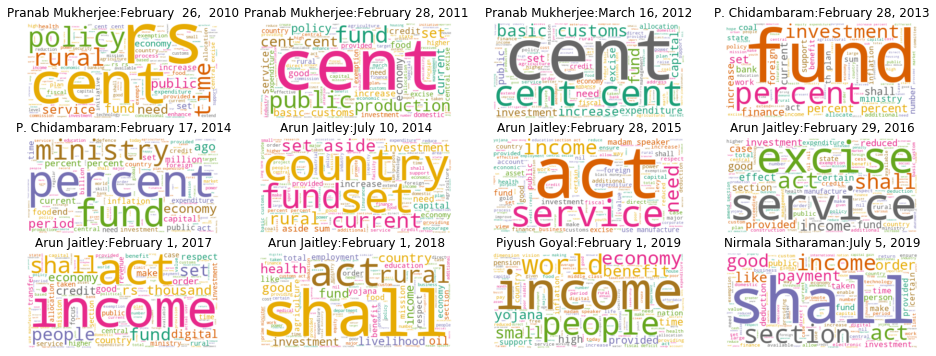

In [430]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)
data_clean.index = data_clean[['Speaker_Name','Date_Of_Speech']].apply(lambda x: ':'.join(str(s) for s in x), axis=1)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
spaeker_names = data.columns
# Create subplots for each speech
for index, speech in enumerate(data.columns):
    
        wc.generate(data_clean.Speech_Clean[speech])
        plt.subplot(3, 4, index+1)
        plt.imshow( wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(spaeker_names[index])
plt.show()

In [437]:
text = " ".join(speech for speech in data_clean.Speech_Clean)
print ("There are {} words in the combination of all speeches.".format(len(text)))

There are 822605 words in the combination of all speeches.


Finally, we will wrap up the exploration phase by counting the number of unique words per speech.

In [434]:
# Words counting
unique_list = []
for speech in data.columns:
    uniques = data[speech].nonzero()[0].size
    unique_list.append(uniques)
# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(data.columns, unique_list)), columns=['speech', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)

C:\Users\solharsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


In [435]:
data_unique_sort

,speech,unique_words
11,"Nirmala Sitharaman:July 5, 2019",2086
7,"Arun Jaitley:February 29, 2016",2058
6,"Arun Jaitley:February 28, 2015",1839
9,"Arun Jaitley:February 1, 2018",1778
8,"Arun Jaitley:February 1, 2017",1766
5,"Arun Jaitley:July 10, 2014",1755
2,"Pranab Mukherjee:March 16, 2012",1545
1,"Pranab Mukherjee:February 28, 2011",1475
0,"Pranab Mukherjee:February 26, 2010",1419
3,"P. Chidambaram:February 28, 2013",1416


In [438]:
print(data_cv.shape)
print(cv.get_feature_names())

(12, 5403)


['aa', 'aam', 'ab', 'abatement', 'abeyance', 'abiding', 'ability', 'able', 'abolish', 'abolition', 'abroad', 'abrupt', 'absence', 'absolute', 'absolutely', 'absorb', 'absorbed', 'absorbent', 'absorbing', 'absorptive', 'abundance', 'abundant', 'abuse', 'ac', 'academic', 'academy', 'accelerate', 'accelerated', 'accelerator', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessibility', 'accessible', 'accident', 'accidental', 'accommodate', 'accommodation', 'accomplished', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accountant', 'accounting', 'accreditation', 'accredited', 'accrual', 'accrue', 'accumulation', 'accuracy', 'accurately', 'achievable', 'achieve', 'achievement', 'acid', 'acknowledge', 'acknowledged', 'acquire', 'acquired', 'acquisition', 'acrimony', 'acrylate', 'act', 'action', 'active', 'actively', 'activist', 'activity', 'actual', 'actualize', 'actually', 'acute', 'acutely', 'acyclic', 'ad', 'adaptation', 'adapter', '

# Binary Count vectorizer

In [442]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
data_clean['Speech_Clean']
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("--------------------------------------------------------")
print(df)

vectorizer.vocabulary_

--------------------------------------------------------
    aa  aam  ab  abatement  abeyance  abiding  ability  able  abolish  \
0    0    1   0          0         0        0        0     1        0   
1    0    1   0          1         0        0        1     1        0   
2    0    0   0          1         1        0        0     1        0   
3    0    0   0          1         0        0        0     1        0   
4    0    0   0          0         0        0        0     1        0   
5    0    0   0          0         0        0        1     1        0   
6    0    0   0          1         0        1        1     1        1   
7    1    0   1          1         0        1        0     1        1   
8    1    0   0          0         0        0        0     1        1   
9    1    1   0          0         0        0        1     1        1   
10   0    0   0          0         0        0        0     0        0   
11   1    0   0          0         0        0        1     1       

{'present': 3818,
 'the': 5055,
 'union': 5322,
 'budget': 633,
 'for': 2069,
 'in': 2531,
 'when': 5574,
 'interim': 2676,
 'and': 235,
 'regular': 4143,
 'this': 5083,
 'august': 397,
 'house': 2433,
 'economy': 1618,
 'was': 5525,
 'facing': 1925,
 'grave': 2269,
 'growth': 2287,
 'had': 2301,
 'business': 652,
 'sentiment': 4505,
 'weak': 5544,
 'capacity': 685,
 'to': 5118,
 'sustain': 4942,
 'high': 2380,
 'under': 5281,
 'serious': 4514,
 'threat': 5090,
 'from': 2133,
 'widespread': 5597,
 'economic': 1614,
 'slowdown': 4640,
 'world': 5639,
 'it': 2734,
 'not': 3365,
 'clear': 848,
 'us': 5403,
 'as': 336,
 'also': 197,
 'policy': 3732,
 'many': 3038,
 'other': 3477,
 'how': 2438,
 'crisis': 1200,
 'would': 5646,
 'eventually': 1811,
 'unfold': 5310,
 'what': 5570,
 'be': 491,
 'its': 2736,
 'impact': 2500,
 'on': 3426,
 'momentum': 3197,
 'of': 3409,
 'soon': 4686,
 'will': 5601,
 'we': 5543,
 'able': 7,
 'turnaround': 5243,
 'our': 3480,
 'short': 4569,
 'term': 5034,
 'glob

# N-Grams

In [441]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
texts = data_clean['Speech_Clean']
# CountVectorizer(ngram_range = (ngram_low_limit, ngram_up_limit)) 
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: Pranab Mukherjee:February  26,  2010    present the union budget for  in  when i the i...
Pranab Mukherjee:February 28, 2011      present the union budget for  we are reaching ...
Pranab Mukherjee:March 16, 2012         present the union budget for  for the economy ...
P. Chidambaram:February 28, 2013        present the budget for the year   i recall my ...
P. Chidambaram:February 17, 2014        present the interim budget for  the current ec...
Arun Jaitley:July 10, 2014              present the budget for the year  i  the people...
Arun Jaitley:February 28, 2015          present the budget of the union for the year  ...
Arun Jaitley:February 29, 2016          present the budget for the year   i am this bu...
Arun Jaitley:February 1, 2017           present the budget for  spring is a season of ...
Arun Jaitley:February 1, 2018           present the budget for   madam four ago we to ...
Piyush Goyal:February 1, 2019           present the interim budget for the year  a  i ...
Nir

# Term Frequency

In [443]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
texts = data_clean['Speech_Clean']
vectorizer = TfidfVectorizer(use_idf=False)
vectorizer.fit(texts)
features = vectorizer.transform(texts)
df = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
print("Texts:", texts)
print("--------------------------------------------------------")
print(df)

Texts: Pranab Mukherjee:February  26,  2010    present the union budget for  in  when i the i...
Pranab Mukherjee:February 28, 2011      present the union budget for  we are reaching ...
Pranab Mukherjee:March 16, 2012         present the union budget for  for the economy ...
P. Chidambaram:February 28, 2013        present the budget for the year   i recall my ...
P. Chidambaram:February 17, 2014        present the interim budget for  the current ec...
Arun Jaitley:July 10, 2014              present the budget for the year  i  the people...
Arun Jaitley:February 28, 2015          present the budget of the union for the year  ...
Arun Jaitley:February 29, 2016          present the budget for the year   i am this bu...
Arun Jaitley:February 1, 2017           present the budget for  spring is a season of ...
Arun Jaitley:February 1, 2018           present the budget for   madam four ago we to ...
Piyush Goyal:February 1, 2019           present the interim budget for the year  a  i ...
Nir

- ‘NN’ four nouns
- ‘JJ’ for adjectives
- ‘CC’ for coordinating conjunctions
- ‘RB’ for adverbs
- ‘IN’ for prepositions

# Model generation : Topic Modeling

We are now going to identify the topics that are associated with the speechs using LDA (Latent Dirichlet Allocation)

Re-process our corpus to conserve nouns and adjectives only using the pos_tag function of the nltk library. 
This function returns the part of speech associated with the words in a sentence. Above are some examples of tags :

In [444]:
from nltk import word_tokenize, pos_tag
def nouns_adjs(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    all_nouns_adjs = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)]
    return ' '.join(all_nouns_adjs)
# Apply the nouns function to the transcripts to filter only on nouns and adjectives
data_nouns_adjs = pd.DataFrame(data_clean.Speech_Clean.apply(nouns_adjs))
data_nouns_adjs.head()

,Speech_Clean
"Pranab Mukherjee:February 26, 2010",union budget interim budget regular budget aug...
"Pranab Mukherjee:February 28, 2011",union budget end remarkable fiscal year world ...
"Pranab Mukherjee:March 16, 2012",union budget economy year recovery year i budg...
"P. Chidambaram:February 28, 2013",present budget year i last tenure finance mini...
"P. Chidambaram:February 17, 2014",present interim budget current economic situat...


Let us reconstruct our document-term matrix :

In [446]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
# Re-add the additional stop words since we are recreating the document-term matrix
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
# Recreate a document-term matrix with nouns and adjectives
cvna = CountVectorizer(stop_words=stop_words)
data_cvna = cvna.fit_transform(data_nouns_adjs.Speech_Clean)
data_dtmna  = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adjs.index
data_dtmna.head()

,aa,aam,ab,abatement,abeyance,ability,able,abolition,abrupt,absence,...,youth,youthful,zeolite,zero,zinc,zirconia,zone,zoo,àééä½,é½é
"Pranab Mukherjee:February 26, 2010",0,1,0,0,0,0,5,0,0,0,...,0,0,0,1,0,0,0,0,0,0
"Pranab Mukherjee:February 28, 2011",0,1,0,4,0,1,5,0,0,0,...,2,0,0,0,0,0,1,0,0,0
"Pranab Mukherjee:March 16, 2012",0,0,0,3,1,0,3,0,0,0,...,2,0,0,0,0,0,1,0,0,0
"P. Chidambaram:February 28, 2013",0,0,0,2,0,0,5,0,0,0,...,6,0,0,2,1,0,0,0,0,0
"P. Chidambaram:February 17, 2014",0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [448]:
data_dtmna = data_dtmna.drop(['àééä½','é½é'],axis=1)
data_dtmna.head()

,aa,aam,ab,abatement,abeyance,ability,able,abolition,abrupt,absence,...,young,younger,youth,youthful,zeolite,zero,zinc,zirconia,zone,zoo
"Pranab Mukherjee:February 26, 2010",0,1,0,0,0,0,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"Pranab Mukherjee:February 28, 2011",0,1,0,4,0,1,5,0,0,0,...,1,2,2,0,0,0,0,0,1,0
"Pranab Mukherjee:March 16, 2012",0,0,0,3,1,0,3,0,0,0,...,0,0,2,0,0,0,0,0,1,0
"P. Chidambaram:February 28, 2013",0,0,0,2,0,0,5,0,0,0,...,3,0,6,0,0,2,1,0,0,0
"P. Chidambaram:February 17, 2014",0,0,0,0,0,0,4,0,0,0,...,5,0,0,0,0,0,0,0,0,0


#### The LDA function we will use to identify the topics is LdaModel of th gensim library. It requires three arguments :
- corpus : a sparse matrix that we generate from the docment-term matrix
- num_topics : number of topics that we want the algorithm to identify
- passes : the number of iterations through the corpus during training

In [450]:
# Create the gensim corpus
import gensim
from gensim import matutils, models
import scipy.sparse
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))
# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

Let us examine the three topics that are the most relevent in our corpus.
It is important to know that the topics that the algorithm identifies can vary from one execution to another because they depend on the initial assignment of the words to the topics. Hence, the unsupervised property of LDA model.

In [451]:
ldana = models.LdaModel(corpus=corpusna, num_topics =3 , id2word=id2wordna, passes=20)
ldana.print_topics()

[(0,
  '0.014*"percent" + 0.007*"investment" + 0.006*"funds" + 0.006*"act" + 0.006*"income" + 0.005*"fund" + 0.005*"capital" + 0.005*"section" + 0.005*"economy" + 0.005*"current"'),
 (1,
  '0.013*"act" + 0.010*"income" + 0.009*"section" + 0.007*"customs" + 0.007*"service" + 0.006*"excise" + 0.006*"nil" + 0.006*"credit" + 0.006*"investment" + 0.005*"goods"'),
 (2,
  '0.023*"cent" + 0.007*"customs" + 0.006*"fiscal" + 0.006*"economy" + 0.006*"basic" + 0.006*"rural" + 0.006*"country" + 0.005*"public" + 0.005*"central" + 0.005*"excise"')]

#### We can interprete the three topics as follows :
- 
-
-

We will then learn to identify which topics are discussed in each document.


In [454]:
# Let's take a look at which topics each speech contains
corpus_transformed = ldana[corpusna]
# 1: Sorting topics for each speech
sorted_corpus_transformed = [sorted(a, key=lambda x: x[1], reverse=True) for a in corpus_transformed]
[a for a in enumerate(corpus_transformed)]
# 2: Matching topics to speeches
topics = list(zip(data_dtmna.index, [c[0][0] for c in sorted_corpus_transformed], [c[1][0] if len(c)>1 else -1 for c in sorted_corpus_transformed], [c[2][0] if len(c)>2 else -1 for c in sorted_corpus_transformed]))
# 3: Saving the result in a DataFrame
df = pd.DataFrame(topics, columns = ['speech', 'topic 1', 'topic 2', 'topic 3'])
df

,speech,topic 1,topic 2,topic 3
0,"Pranab Mukherjee:February 26, 2010",2,-1,-1
1,"Pranab Mukherjee:February 28, 2011",2,-1,-1
2,"Pranab Mukherjee:March 16, 2012",2,-1,-1
3,"P. Chidambaram:February 28, 2013",0,2,-1
4,"P. Chidambaram:February 17, 2014",0,2,-1
5,"Arun Jaitley:July 10, 2014",2,-1,-1
6,"Arun Jaitley:February 28, 2015",1,-1,-1
7,"Arun Jaitley:February 29, 2016",1,-1,-1
8,"Arun Jaitley:February 1, 2017",1,2,-1
9,"Arun Jaitley:February 1, 2018",1,-1,-1


In [455]:
# This clearly suggests that Pranab Mukherjee and Arun Jaitly focuses on topic 1 more, P.Chidambaram on topic 2.
#Piyush Goyal and Nirmal Sitharam focuesses more on topic 2. 

Let us this time construct a dataframe with the weights, that will give us a measure of the topics representation in each speech.

In [457]:
# Including probabilities
w_topic1 = [c[0][1] if c[0][0] == 0 else c[1][1] if (len(c)>1 and c[1][0] == 0) else c[2][1] if ( len(c)>2 and c[2][0] == 0) else 0 for c in sorted_corpus_transformed]
w_topic2 = [c[0][1] if c[0][0] == 1 else c[1][1] if (len(c)>1 and c[1][0] == 1) else c[2][1] if (len(c)>2 and c[2][0] == 1) else 0 for c in sorted_corpus_transformed]
w_topic3 = [c[0][1] if c[0][0] == 2 else c[1][1] if (len(c)>1 and c[1][0] == 2) else c[2][1] if (len(c)>2 and c[2][0] == 2) else 0 for c in sorted_corpus_transformed]
p_topics = list(zip(data_dtmna.index, w_topic1, w_topic2, w_topic3))
p_df = pd.DataFrame(p_topics, columns = ['speech', 'topic1', 'topic2', 'topic3'])
p_df

,speech,topic1,topic2,topic3
0,"Pranab Mukherjee:February 26, 2010",0.000000,0.000000,0.999748
1,"Pranab Mukherjee:February 28, 2011",0.000000,0.000000,0.999761
2,"Pranab Mukherjee:March 16, 2012",0.000000,0.000000,0.999749
3,"P. Chidambaram:February 28, 2013",0.918045,0.000000,0.081798
4,"P. Chidambaram:February 17, 2014",0.816179,0.000000,0.183539
5,"Arun Jaitley:July 10, 2014",0.000000,0.000000,0.999096
6,"Arun Jaitley:February 28, 2015",0.000000,0.999104,0.000000
7,"Arun Jaitley:February 29, 2016",0.000000,0.999871,0.000000
8,"Arun Jaitley:February 1, 2017",0.000000,0.598241,0.401672
9,"Arun Jaitley:February 1, 2018",0.000000,0.996675,0.000000


## Evaluation

Finally, we are going to use the weights of the topics to generate visualizations of all speeches and analyze the similarity of one to another in terms of topics closeness.


For example, let’s visualize the topic representations of the speeches of Pranab Mukherjee and Arun Jaitley.

First we generate a scatter plot of these speeches based on their first and second topics weights.

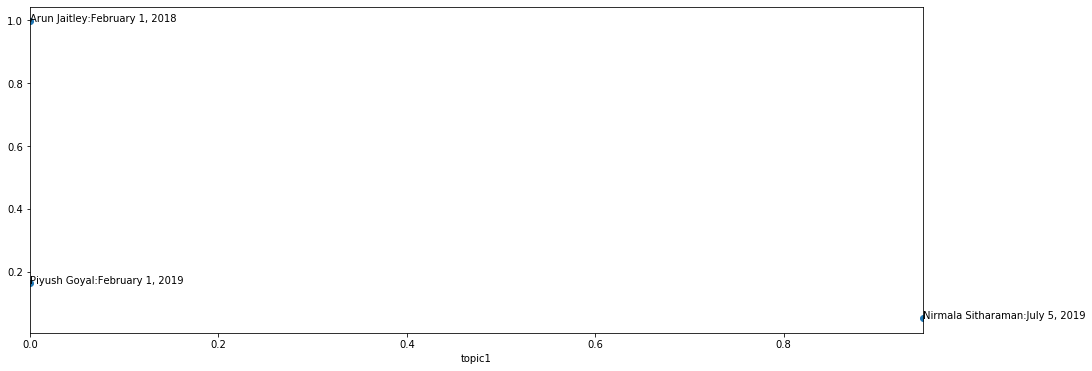

In [458]:
from matplotlib.pyplot import draw
# We visualize the last three inaugural speeches
p_df12 = p_df[-3:]
ax12 = p_df12.set_index('topic1')['topic2'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(p_df12['topic1'], p_df12['topic2'], p_df12['speech'], ax12)
draw()

We can also generate the same graph for the second and third topics.


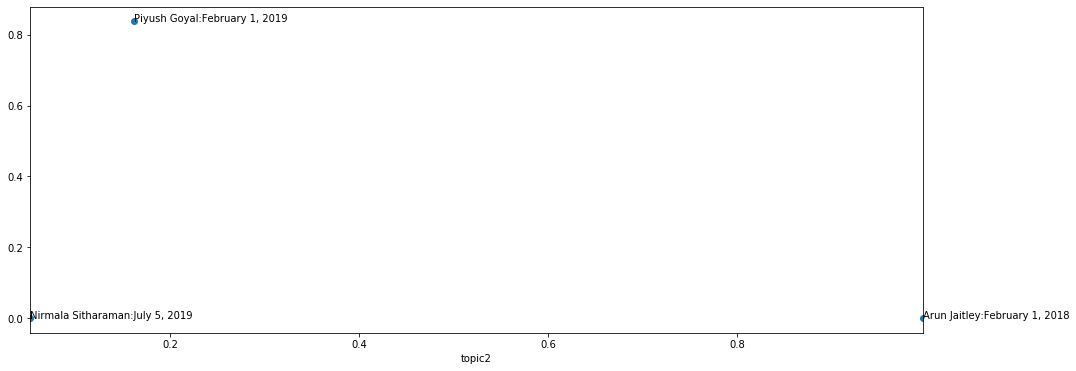

In [459]:
p_df23 = p_df[-3:]
ax23 = p_df23.set_index('topic2')['topic3'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(p_df23['topic2'], p_df23['topic3'], p_df23['speech'], ax23)
draw()

We can clearly observe the distance between the speeches of the three speakers which can be explained by the divergence in their strategies and vision for their country. 

For instance, x’s speeches are focused on """"""""""""""""""" whereas y's speeches involve international peace and human rights.